In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision = 2) # print 옵션 설정 소수점 아래를 고정 값을 정하여 출력 

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits["fruit_label"]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0) # 디폴트로 Train 75 % test 25% 


# 각 Feature마다 값의 범위가 다르다. 각 Feature의 값을 일정한 범위 또는 규칙에 따르게 하기 위해서 스케일링을 사용
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train) # 훈련데이와 훈련라벨에 fit 사용 , knn객체의 내부상태를 업데이트하는 훈련과정 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


모델은 연구되거나, 예측되는 하나 이상의 입력변수와 출벽변수 사이의 관계를 표현하는 특정 수학적 또는 계산적 설명     
통계 입력변수를 독립변수 , 출력변수를 종속변수 y= f(x)    
머신러닝에서는 입력 또는 독립변수를 지칭하기 위해 feture 용어 사용 , 출력, 종속변수는 대상 값 또는 대상레이블로 표현 

#### Overfitting and Underfitting

Generalization ability refers to an algorithm's ability to give accurate predictions for new , previously unseen data.

* Asuumtions :
 - Future unseen data(test data) will have the same properties as the current traning sets.
 - Thus, models that are accurate on the traning set are expected to be accrate on the test set.
 - But that may not happen if the trained model is tuned too specifically to the training set.
 
 
* Models that are too complex for the amount of training data available are said to **overfit** and are not likely to generalization well to new example.
* Models that are too simple. that don't even do well the training data, are said to **underfit** and also not likely to generalize well.

#### Datasets

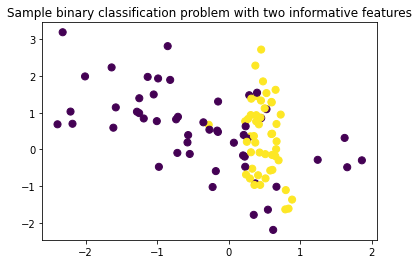

In [2]:
# Scikit-Learn 패키지는 분류(classification) 모형의 테스트를 위해 여러가지 가상 데이터를 생성하는 함수를 제공
# make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻
from sklearn.datasets import make_classification

#  synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
# 표본수 , 독립변수의 수, 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
# 클래스 당 클러스터의 수, 예측라벨을 임의로 바꿔서 100%의 정확도에 다다르지 못하게 방지, 클래스간 얼마나 떨어져있는가
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

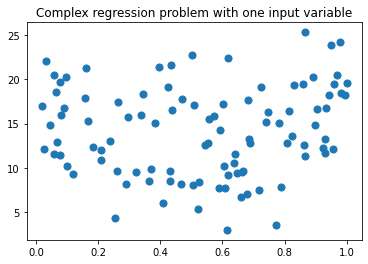

In [3]:
# synthetic dataset for more complex regression
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

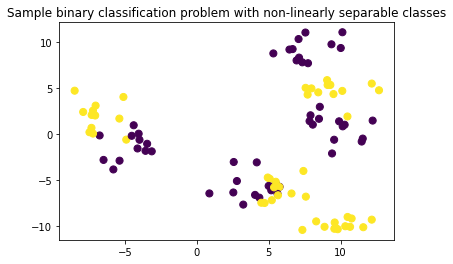

In [4]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

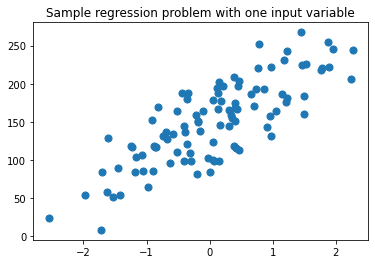

In [5]:
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')

# 표본의 수 , 독립변수의 수 , 독립변수중 실제로 종속변수와 상관관계가 있는 독립변수의 수, 절편, 종속변수에 더해지는 정규분포의 표준편차
X_R1 , y_R1 = make_regression(n_samples =100 , n_features = 1 , n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### K-Nearest Neighbors: Classification and Regression

Given a training set X_train with labels y_train, and given a new instance x_test to be classified:
1. Find the most similar instances (let's call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN e.g. simple majority vote

In [6]:
#  Regression
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


The R2 ("r-squared") Regression Score
* Measures how well a prediction model for 

regression fits the given data.
* The score is between 0 and 1:
- A value of 0 corresponds to a constant model that predicts the mean value of all training target values.
- A value of 1 corresponds to perfect prediction
- Also known as "coefficient of determination"


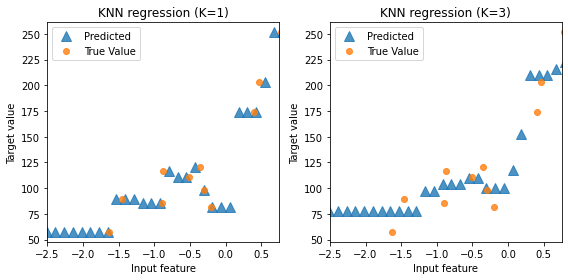

In [7]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

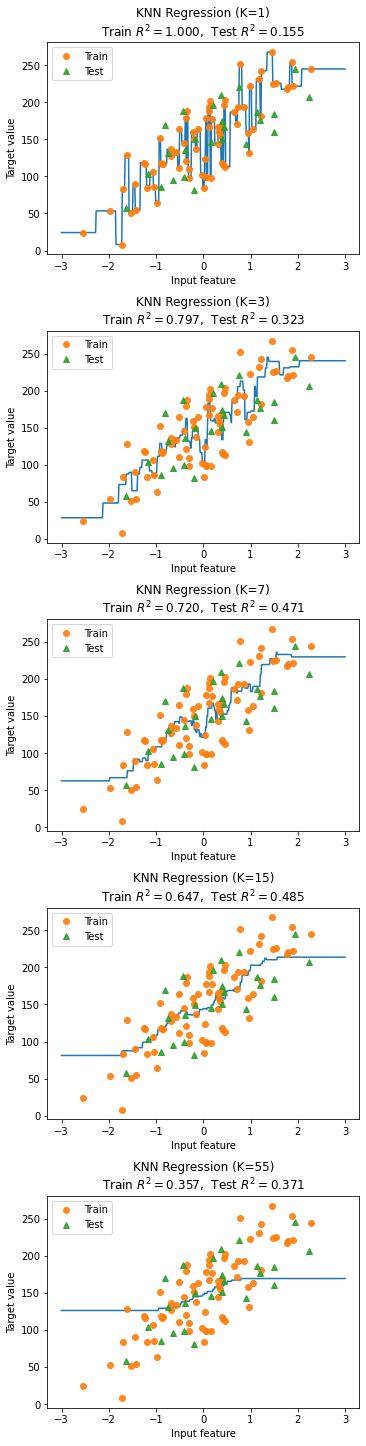

In [8]:
fig, subaxes = plt.subplots(5,1, figsize = (5,20))

X_predict_input = np.linspace(-3,3,500).reshape(-1,1)  # 균등한 간격 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

KNeighborsClassifier and KNeighborsRegressor: important parameters  

Model complexity  
- n_neighbors : number of nearest neighbors (k) to consider,  Default = 5  

Model fitting  
- metric: distance function between data points
- Default: Minkowski distance with power parameter p = 2  (Euclidean)

### Linear Regression: Least-Squares

In [9]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


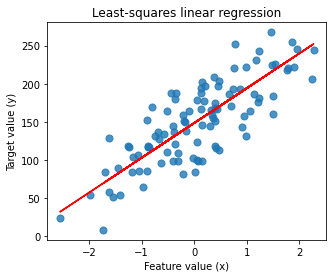

In [10]:
fig , ax = plt.subplots(figsize = (5,4))
ax.scatter(X_R1 , y_R1, marker  = "o" , s= 50 , alpha = 0.8)
ax.plot(X_R1 , linreg.coef_ * X_R1 + linreg.intercept_ , 'r-')   # Y = WoXo + B ,  W =  linreg.coef_ , b= linreg.intercept_
ax.set_title("Least-squares linear regression")
ax.set_xlabel("Feature value (x)")
ax.set_ylabel("Target value (y)")
plt.show()

### Ridge regression

Ridge regression learns w, b using the same least-squares criterion but adds a penalty for large variations in w parameters
* Once the parameters are learned, the ridge regression prediction formula is the same as ordinary least-squares.
* **The addition of a parameter penalty is called regularization. Regularization prevents overfitting by restricting the model, typically to reduce its complexity.** 
* Ridge regression uses L2 regularization: minimize sum of squares of w entries
* The influence of the regularization term is controlled by the 𝛼𝛼 parameter.
*  Higher alpha means more regularization and simpler models

능선회귀는 최소제곱법과 같은 기준을 쓰지만 차이가 존재 , 훈련 단계 중에 feature weight 에 패널티를 더하며 wi값은 매우 큼 , weight가 크다는 의미는 제곱값의 합이 크다는 의미한다. 능선회귀로 선형모델에서 w,b 매개변수를 추정하고 나면 , 새 인스턴스에 대한 y값 예측도 최소제곱법과 같은 방법으로 가능하다.

In [11]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[36.27]
R-squared score (training): 0.650
R-squared score (test): 0.545
Number of non-zero features: 1


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# 각 Feature마다 값의 범위가 다르다. 각 Feature의 값을 일정한 범위 또는 규칙에 따르게 하기 위해서 스케일링을 사용
# 최소값(Min)과 최대값(Max)을 사용해서 '0~1' 사이의 범위(range)로 데이터를 표준화해주는 '0~1 변환
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 132.076872087215
ridge regression linear model coeff:
[31.24]
R-squared score (training): 0.179
R-squared score (test): 0.173
Number of non-zero features: 1


In [13]:
# 최소특징값과 최대 특징값 계산 
# 중요한점은 어떻게 최소최대 스케일링 , 훈련 및 테스트 셋의 학습시나리오에서의 특징 표준화를 적용시키는가
# 훈련과 테스팅에 동일한 스케일러 객체를 적용 , 테스트셋이 아닌 훈련데이터에서 스케일러 객체를 훈련 특징표준화에 핵심 
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(X_train)
x_train_s  = s.transform(X_train)
x_test_s = s.transform(X_test)
clf = Ridge().fit(x_train_s , y_train)
r2_score = clf.score(x_test_s , y_test)

# It can be more efficient to do fitting and transforming together on the training set using the fit_transform method

Feature Normalization: The test set must use identical scaling to the training set
- Fit the scaler using the training set, then apply the same scaler to transform the test set.
- Do not scale the training and test sets using different scalers: this could lead to random skew in the data.
- Do not fit the scaler using any part of the test data: referencing the test data can lead to a form of data leakage.

data leakage란 training 데이터 외의 정보가 모델을 만드는데 사용될때 발생 , 추가적인 정보를 통해 모델은 다른 방법으로는 알지 못하는 무언가를 배우거나 알수 있으며, 생성되는 모델의 예상 성능을 무효화 할 수 있다.

#### Ridge regression with regularization parameter: alpha

In [14]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.68, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.64, r-squared test: 0.55

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.30, r-squared test: 0.29

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.18, r-squared test: 0.17

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.08, r-squared test: 0.07

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.04, r-squared test: 0.03

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.00, r-squared test: -0.01



Norm     
* Norm=절대값이 아니다. 많은 Norm 중 하나가 절댓값 |-1| = 1 , |(2,5)| 
* Norm은 어떤값의 크기를 계산하여 , 비교가 가능하게끔 하는 함수 

L1 Norm(Mahattan Distance, Taxicab geometry) 은 두개의 벡터를 빼고 , 절대값을 취한 뒤 합한것
* x = (1,2,3) , y = (-4,-5,-6)  -> d(x,y) = |1-(-4)|+|2-(-5)|+|3-(-6)| = 5+7+9 

L2 Norm(Euclidean Distance) L2 Norm은 두 개의 벡터의 각 원소를 빼고, 제곱을 하고, 합치고, 루트를 씌운 것
* x=(1,2,3), y=(-4,-5,-6)은 d(x,y)=root(5+7+9)

<img src="https://blog.kakaocdn.net/dn/FIyhg/btqCRyyEJ86/UbaS1cpDzIk0wvuc1DeeK1/img.png" width = "400px" heigh="300px"><img>

L1 Loss Norm을 기준으로 만들어진 L1 Loss 수식 또한 크게 다를 바 없다. 두 개의 벡터가 들어가던 자리에 실제 타겟값(y_true)와 예측 타겟값(y_pred)이 들어갔을 뿐이다.L1 Loss는 L2 Loss에 비해 이상치(Outlier)의 영향을 덜 받는, 이상치/에러값으로 부터 영향을 크게 받지 않는 특성을 가진다.   


L2 Loss도 다르지 않지만 최종적으로 루트를 취하지 않는다는 차이가 있다.두 개 값의 절대값을 계산하던 L1 Loss와는 달리 L2 Loss는 제곱을 취하기에, 이상치가 들어오면 오차가 제곱이 돼서 이상치에 영향을 더 받기 때문에 이상치가 있는 경우 적용하기 힘든 방법론




L1 Regularization
기존 Loss에 절댓값만큼의 패널티를 줌으로써 Cost가 더 커지게 만든 셈인데, 모델 Weight의 과도한 변화를 막는다. 저기서 람다가 작아질 수록, 약한 정규화가 적용된다. Sparse feature에 의존한 모델에 L1 Regularization을 사용하면, 불필요한 Feature에 대응하는 Weight를 정확히 0으로 만들어버려, Feature selection의 효과를 낸다.

L1 Regularization을 사용하는 선형 회귀 모델을 Lasso model이라고도 한다.

 

L2 Regularization
 L2 Reg는 불필요한 Feature(이상치)에 대응하는 Weight를 0에 가깝게 만들 뿐, 0으로 만들지는 않는다. 이런 특성 때문에, 강하게 밀어붙이는 L1 Reg반해 L2 Reg은 선형 모델의 일반화 능력을 항상 개선시키는 것으로 알려져 있다. 마지막으로 L2 Reg을 사용하는 선형 회귀 모델을 Ridge model이라고 한다.

<img src="https://blog.kakaocdn.net/dn/b3LOX0/btqCQ4xRyJi/Ym9mmK5g7G1lXRbrxEbnO1/img.png" width = "400px" heigh="300px"><img>

### Lasso regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_R1), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 55.83884866864045
lasso regression linear model coeff:
[175.02]
Non-zero features: 1
R-squared score (training): 0.650
R-squared score (test): 0.545

Features with non-zero weight (sorted by absolute magnitude):
	[-0.36], 175.016


### Lasso regression with regularization parameter: alpha

In [16]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.68, r-squared test: 0.51

Alpha = 1.00
Features kept: 1, r-squared training: 0.67, r-squared test: 0.53

Alpha = 2.00
Features kept: 1, r-squared training: 0.65, r-squared test: 0.55

Alpha = 3.00
Features kept: 1, r-squared training: 0.61, r-squared test: 0.54

Alpha = 5.00
Features kept: 1, r-squared training: 0.50, r-squared test: 0.47

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02



### Polynomial Features with Linear Regression

Generate new features consisting of all polynomial(다항) combinations of the original two features 𝑥𝑥0, 𝑥𝑥1 .
- the degree of the polynomial specifies how many variables participate at a time in each new feature 
- This is still a weighted linear combination of features, so it's still a linear model, and can use same least-squares estimation method for w and b.

Why would we want to transform our data this way?
- To capture interactions between the original features by adding them as features to the linear model.
- To make a classification problem easier 
* More generally, we can apply other non-linear transformations to create new features
- (Technically, these are called non-linear basis functions)
* Beware of polynomial feature expansion with high as this can lead to complex models that overfit
- Thus, polynomial feature expansion is often combined with a regularized learning method like ridge regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

# 차수가 2로 설정된 다항식 특징 객체를 만든 다음 원본 XF1 특징의 다항식 특징 객체의 적합변환방법을 호출하여
# 새로운 다항식 변환 특징 XF1_poly를 생성

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(p

## Linear models for classification

### Logistic regression
확률 모델로서 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법이다.

로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

로지스틱 함수 적용의 효과는 선형함수의 출력을 압축하여 0과 1사이의 범위로 제한하는 것

The logistic function transforms real-valued input to an output number ybetween 0 and 1, interpreted 
as the probability the input object belongs to the positive class, given its input features 

In [18]:
from sklearn.linear_model import LogisticRegression

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state = 0))
clf = LogisticRegression(C=100).fit(X_train, y_train)


h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


#### Logistic regression regularization: C parameter

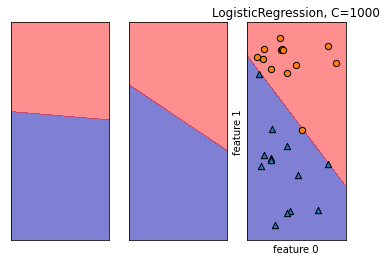

In [19]:
from mglearn.plots import plot_2d_separator
from mglearn.datasets import make_forge

x, y = make_forge()
c_set = [0.001, 1, 1000]
_, axes = plt.subplots(1, 3)

for c_arg, axe in zip(c_set, axes.ravel()):
    params = {'C':c_arg}
    clf = LogisticRegression(**params).fit(x, y)

    plot_2d_separator(clf, x, fill=True, ax=axe, eps=0.5, alpha=0.5)
    
    idx_set = []
        
    for i in np.unique(y): # np.unique: 유일한 값만 리턴
        idx = np.where(y==i)[0]
        idx_set.append(idx)

axe.scatter(x[idx_set[0]][:, 0], x[idx_set[0]][:, 1], s=40, edgecolors='k', # edgecolors='k' : 'k'=black
                    label='class 0', marker='^')
axe.scatter(x[idx_set[1]][:, 0], x[idx_set[1]][:, 1], s=40, edgecolors='k',
                label='class 1', marker='o')
axe.set_title('{}, C={}'.format(clf.__class__.__name__, c_arg))
axe.set_xlabel('feature 0')
axe.set_ylabel('feature 1')


plt.show()

Logistic Regression: Regularization
- L2 regularization is 'on' by default (like ridge regression)
- Parameter C controls amount of regularization (default 1.0)
- As with regularized linear regression, it can be important to normalize all features so that they are on the same scale.


### Support Vector Machines

 이진분류법은 회귀분석에서 보았던 선형 함수 형식을 사용 연속목표값을 예측하는 대신 선형함수의 출력을 가져와 사인함수를 적용하여 두개의 클래스 레이블로 두가지 값을 가지는 이진 출력을 생성한다. 만약 목표값이 0보다 크면 함수는 +1을 반환 , 목표값이 0보다 작다면 -1를 반환

#### Classifier Margin  
두 클래스 사이에 제공할 수 있는 분리 정도를 보상하는 것이 좋은 분류자를 정의하는 것  
Defined as the maximumwidth the decision boundaryarea can be increased before hitting a data point.  
데이터 포인트를 치기전에 결정경계를 증가시킬 수 있는 너비, 여백은 결정경계에서 가장 가까운 데이터 점에 수직으로 갈 수 있는 너비의 거리

Maximum margin classifier The linear classifier withmaximum margin is a linear Support Vector Machine(LSVM)  

서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

최적의 결정 경계(Decision Boundary)  
결정경계는 데이터군으로부터 최대한 멀리 떨어지는게 좋다. 실제로 서포트 벡터 머신(Support Vector Machine)이라는 이름에서 Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다. 이 데이터들이 경계를 정의하는 결정적인 역할을 하는 셈이다.

마진(Margin)
마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width = "200px" heigh="300px"><img>

가운데 실선 '결정 경계'. 실선으로부터 검은 테두리가 있는 검은색 점1 , 하얀색점 2개까지 영역을 두고 점선을 그어놓았다. 점선으로부터 결정 경계까지의 거리가 바로 ‘마진(margin)’이다.

최적의 결정 경계는 마진을 최대화한다.

그리고 위 그림에서는 x축과 y축 2개의 속성을 가진 데이터로 결정 경계를 그었는데, 총 3개의 데이터 포인트(서포트 벡터)가 필요했다. 즉, n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다는 걸 알 수 있다.

The strength of regularization is determined by C
- Larger values of C: less regularization
- Fit the training data as well as possible
- Each individual data point is important to classify correctly
- Smaller values of C: more regularization
- More tolerant of errors on individual data points


Linear Models: Pros and ConsPros:
- Simple and easy to train , Fast prediction. Scales well to very large  datasets.
- Works well with sparse data.,Reasons for prediction are  relatively easy to interpret.
Cons:
- For lower-dimensional data, other models may have superior generalization performance.
- For classification, data may notbe linearly separable (more on this in SVMs with non-linear kernels)


linear_model: Important Parameters   
Model complexity
- alpha: weight given to the L1 or L2 regularization term in regression models ,default = 1.0
- C: regularization weight for LinearSVC and LogisticRegression classification models ,default = 1.0


In [20]:
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

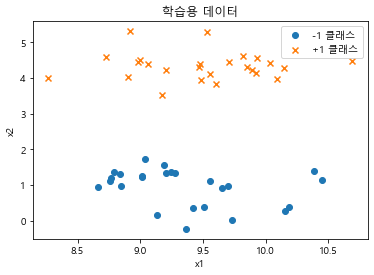

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

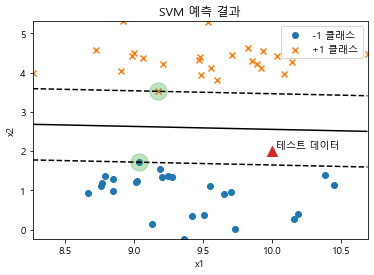

In [22]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)
SVC(kernel='linear', C=1e10)

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

### Multi-Class Classification

In [23]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.23  0.72]
 [-1.63  1.15]
 [ 0.08  0.31]
 [ 1.26 -1.68]]
Intercepts:
 [-3.32  1.2  -2.75  1.16]


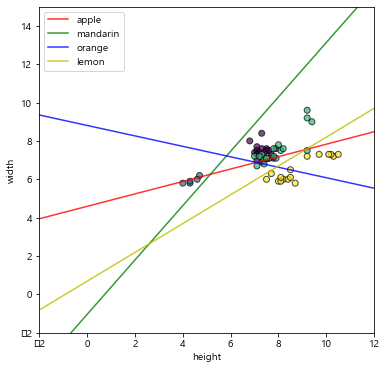

In [24]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']


plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d , edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

### Kernelized Support Vector Machines
선형으로 분류되지 않은 모델에 적용 

#### Radial Basis Function Kernel
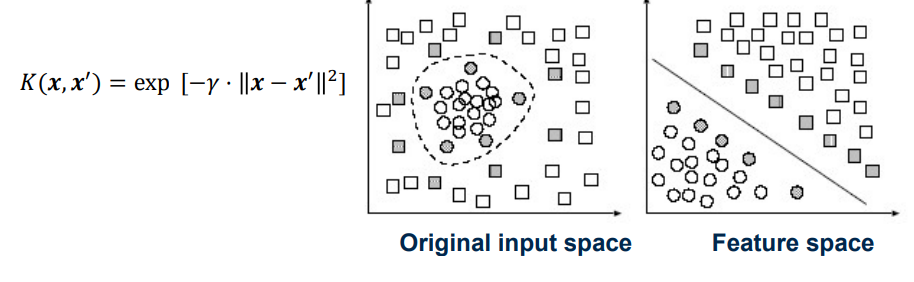
방사형기저함수커널을 사용하여 원클래스의 일정거리안에 있는 모든 점을 변환된 특징 공간의 한 영역으로 변환, 특정 반경 밖에 있는 사각형 클래스의 모든 점은 특징 공간의 다른 영역으로 이동한다. 검은색 원과 사각형은 변환된 특징 공간에서 서포트 벡터 머신의 최대 마진을 따라 위치 할 수 있는 점들을 나타낸다. 커널화된 서포트백터머신은 원래 입력공간이 아닌 변환된 특징 공간에서 선형 분류기를 사용하여 클래스 간의 최대 마진으로 결정경계를 찾으려고 한다. 커널화된 SVM은 변환된 특징 표현이 내재된 고차원 공간에서 점들의 쌍 사이의 유사성을 계산해 이러한 관점에서 더 복잡한 결정경계를 계산할 수 있다.

Radial Basis Function kernel: Gamma Parameter  
단 하나의 추세 예제의 영향이 어느 정도까지 도달하는지를 제어하며, 결정경계가 입력 공간의 주변지점까지 얼마나 긴밀하게 영향을 미치는지 영향을 준다. 감마값이 작다는 것은 유사성 반경이 크다는 것을 의미, 따라서 더 멀리 떨어진 포인트까지 유사하다고 인식된다. 감마값이 커질 수록 커널값K에 더 빨리 도달하며 아주 가까이 있는 포인트들만 유사하다가고 인식된다.

### Cross-validation
지도학습 Method 절차  
데이터셋을 train/test로 분리, 트레이닝 세트에 fit method를 호출해서 모델값을 추측, predict method 써서 새 데이터 인스턴스에 모델을 적용하거나 score method를 써서 트레이닝한 모델의 성능을 테스트셋에서 평가

**교차검증은 단순히 데이터셋을 train/test 나누는걸 넘어서 여러번의 과정을 반복한 후 개별과정마다 모델을 생성하고 평가한다.**
교차검증은 기본적으로 더 안정적인 추정치를 제공, 한번의 train set에 전적으로 의존하는게 아니라 여러개의 train/test split을 한 후 결과를 평균내기 때문이다. 일반적으로 개별 fold (개별데이터셋)마다 나오는 정확도를 합산하 후 평균을 내어서 구해진 평균교차 검증 점수를 모델의 정확도의 측도로 사용한다.  

Stratified Cross-validation  
층화 k-겹 교차검증은 데이터를 분할할때 개별 폴드 마다의 클래스간 분포가, 전체 데이터의 분포에 최대한 상응하게 분할해준다.

In [25]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75 0.75 0.83 0.83 0.82]
Mean cross-validation score (3-fold): 0.797


In [26]:
# 모델 매개볒ㄴ수가 교차검증 스코어에 미치는 영향 파악 

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [27]:
print(train_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]


In [28]:
print(test_scores)

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

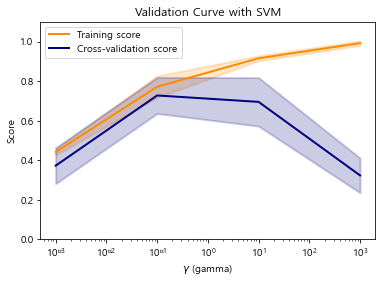

In [29]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()



#The validation curve shows the mean cross-validation accuracy (solid lines) for training (orange) and test 
#(blue) sets as a function of the SVM parameter (gamma). It also shows the variation around the mean (shaded 
# region) as computed from kfold cross-validation scores

### Decision Trees
어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로서 결정 트리를 사용한다.트리 모델 중 목표 변수가 유한한 수의 값을 가지는 것을 분류 트리라 한다. 이 트리 구조에서 잎(리프 노드)은 클래스 라벨을 나타내고 가지는 클래스 라벨과 관련있는 특징들의 논리곱을 나타낸다. 결정 트리 중 목표 변수가 연속하는 값, 일반적으로 실수를 가지는 것은 회귀 트리라 한다.

의사결정트리를 작성할 때의 목표는 가장 적은 단계로 데이터를 분류할때 정확도가 가장좋은 일련의 질문을 찾는 것  
결정트리는 가장 정보성 있게 나눠질 수 있는 특징을 찾는 것으로 알고리즘 시작, 특정 기능값에 대한 데이터의 임의의 분할에 대해 , 최상의 분할의 경우에도 일부 예제는 여전히 잘못 분류되거나 추가분할이 필요할 수 있다. 의사결정 트리에서 모든것이 같거나 적어도 목표값의 대부분을 차지할 때까지 이 과정을 재귀적으로 계속 진행할 수 있다. leaf node 가 모두 동일한 목표값을 갖는 트리는 leaf node  어느정도의 혼합을 포함하도록 허용된 트리와 구분하여 순수한 트리라고 지칭한다. 

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#세개의 클래스를 예측할때 학습 및 테스트 정확도를 계산, 훈련데이터는 1.0의 정확성으로 완벽하게 예측된 반면에
# 테스트데이터는 상대적으로 정확도가 떨어짐, 이는 트리가 과적합되었다는 표시이며, 리프노드가 순수할 때까지 규칙을 계속 
# 추가하는 일반의사결정트리를 구축하는 과정에서 발생하는 문제다.

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Setting max decision tree depth to help avoid overfitting

In [31]:
# 과적합을 방지하기 위한 방법 
# 사전 가지치기 ( 트리생성을 일찍 중단 )
# 사후가지치기 또는 가지치기 (트리를 만든 후 다시 간단한 형태로 되돌리는 방법)
# 결정트리 구현과 사이킷런에서는 사전 가지치기 구현만 가능 

clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


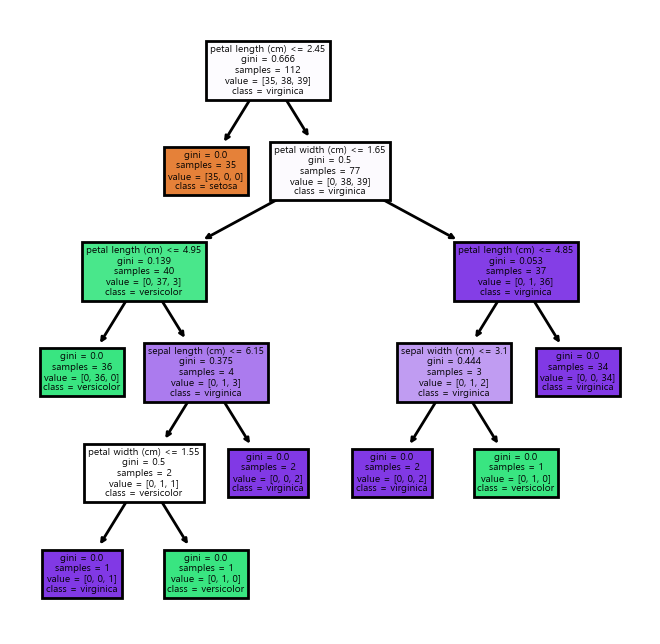

In [32]:
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

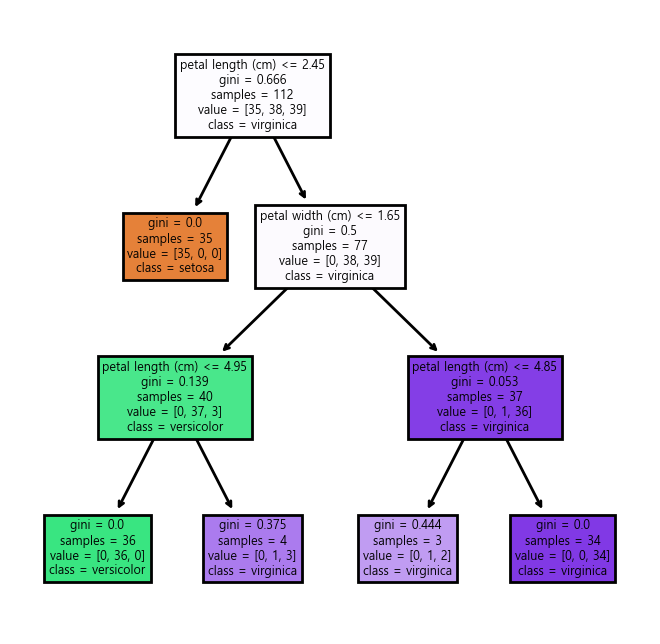

In [33]:
#사전 가지치기 
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(clf2,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

#### Feature importance`

Feature Importance: How important is a feature to overall prediction accuracy?
- A number between 0 and 1 assigned to each feature.
- Feature importance of 0 the feature was not used in prediction.
- Feature importance of 1 the feature predicts the target perfectly.
- All feature importances are normalized to sum to 1.


Feature importances:
[0.01 0.02 0.55 0.43]
sepal length (cm) : 0.007
sepal width (cm) : 0.018
petal length (cm) : 0.546
petal width (cm) : 0.429


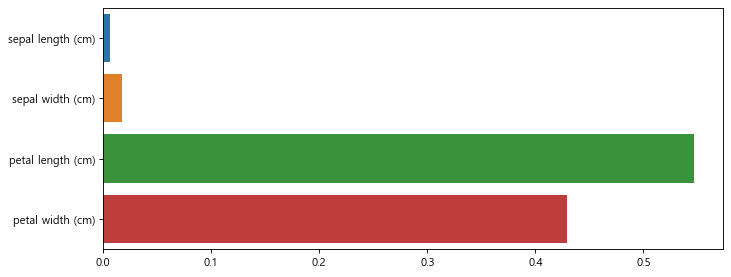

In [34]:
import matplotlib as pyplot
import seaborn as sns 

print("Feature importances:\n{0}".format(np.round(clf.feature_importances_, 3)))

for n,v in zip (iris.feature_names, clf.feature_importances_) :
     print('{0} : {1:.3f}'.format(n, v))


fig,ax = plt.subplots(figsize=(10,4), dpi=80)

sns.barplot(x=clf.feature_importances_ , y=iris.feature_names, ax = ax)
plt.show()

Decision Trees: Pros and ConsPros:
- Easily visualized and interpreted.
- No feature normalization or scaling typically needed.
- Work well with datasets using a mixture of feature types (continuous, categorical, binary)
Cons:
- Even after tuning, decision trees can often still overfit.
- Usually need an ensemble of trees for better generalization performance

Decision Trees: DecisionTreeClassifier Key Parameters 
- max_depth: controls maximum depth (number of split points). Most common way to reduce tree complexity and overfitting.
- min_samples_leaf: threshold for the minimum # of data instances a leaf can have to avoid further splitting.
- max_leaf_nodes: limits total number of leaves in the tree. 